# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4a: Collaborative Filtering </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Aditya P
- SRN: PES1UG22CS040
- Section: 'A'

Assume there exists a parallel universe and you are a Data Analyst intern at Parallel Earth Amazon. The company wants to test product recommendations and improve their product catalogue. For this exercise, you are tasked with the analysis of User Ratings for Health and Personal Care Products.



# Details of the dataset:

### Columns in this dataset:

- 'sl': serial number of records

- 'user_id': Unique identifier for users

- 'title': title of the review

- 'text': body of the review

- 'asin': Amazon Standard Identification Number (ASIN) is a ten-digit alphanumeric code that identifies products on Amazon. It's unique for each product and is assigned when you create a new product in Amazon's catalog.

- 'parent_asin': The abstraction of the variations is called the parent ASIN. It can't be purchased and hence is not associated with an offer.

- 'rating': Product rating (out of 5)

- 'timestamp': In milliseconds

- 'helpful_vote': Interactions of other users with this review

- 'verified_purchase': (True or False) Amazon has verified that the person writing the review purchased the product from Amazon, and didn't receive the product at a discount.



## Some conceptual information:

### Utility Matrix

This is an m x n matrix (m users, n items) that consists the rating / preference of each user for each item.

It is usually quite sparse as the rating values are usually present for very few user-item pairs.



### Neighborhood-based methods

The main idea with neighborhood-based methods is to leverage either user-user similarity or item-item similarity to make recommendations. These methods assume that similar users tend to have similar behaviors when rating items.

There are mainly two types:



1. **User-based collaborative filtering**: based on similarity between users.

2. **Item-based collaborative filtering**: based on similarity between items.



### Matrix factorization/decomposition

The utility matrix can be represented as a product of two smaller matrices, say U and V, representing users and items respectively.

## Install the required packages

In [ ]:
#install.packages("recommenderlab")

#install.packages("tidyr")

## Load the required packages

In [1]:
# library(dplyr)

# library(tidyr)   

# library(recommenderlab)

# library(ggplot2)

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

## Load and create dataframe

In [7]:
# Your code here

df = pd.read_csv('/kaggle/input/health-and-personal-care-dataset/Worksheet-4a_Health_And_Personal_Care_Dataset.csv')

In [8]:
df.shape

(4276, 10)

In [9]:
df.columns

Index(['Unnamed: 0', 'user_id', 'title', 'text', 'asin', 'parent_asin',
       'rating', 'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

## Perform EDA and Preprocess the dataset to the required format

### 1 point

State some observations that you made after performing EDA.

Feel free to remove any columns you think are not necessary for the following problems.

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove null values and duplicates
- Obtain a subset of the dataset with the required columns only.
- Create the utility matrix


In [10]:
# Your code here
# Step 2: Remove Unnecessary Columns
# We can remove 'Unnamed: 0', 'title', 'text', and 'parent_asin' as they are not needed for collaborative filtering
bkup = df

df = df.drop(columns=['Unnamed: 0', 'title', 'text', 'parent_asin'])
print("\nColumns after dropping unnecessary ones:\n", df.columns)


Columns after dropping unnecessary ones:
 Index(['user_id', 'asin', 'rating', 'timestamp', 'helpful_vote',
       'verified_purchase'],
      dtype='object')


In [11]:
# Step 3: Handling Missing Values
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 user_id              0
asin                 0
rating               0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


In [12]:
# Dropping rows with missing values, if any
df = df.dropna()
print("\nData shape after dropping missing values:", df.shape)


Data shape after dropping missing values: (4276, 6)


In [13]:
# Step 4: Remove Duplicates
# Checking for duplicates and removing them
df = df.drop_duplicates()
print("\nData shape after removing duplicates:", df.shape)


Data shape after removing duplicates: (4276, 6)


In [14]:
# Step 5: Filter for Required Columns
# Subset with only the necessary columns for utility matrix creation: 'user_id', 'asin', 'rating'
df_subset = df[['user_id', 'asin', 'rating']]
print("\nSubset of Data:\n", df_subset.head())


Subset of Data:
                         user_id        asin  rating
0  AE23ZBUF2YVBQPH2NN6F5XSA3QYQ  B08D93ZSWY     5.0
1  AE23ZBUF2YVBQPH2NN6F5XSA3QYQ  B09GL3RDTD     4.0
2  AE23ZBUF2YVBQPH2NN6F5XSA3QYQ  B08RD257KT     2.0
3  AE23ZBUF2YVBQPH2NN6F5XSA3QYQ  B098WFX6TY     5.0
4  AE23ZBUF2YVBQPH2NN6F5XSA3QYQ  B08Z474Q6J     4.0


In [15]:
# Step 6: Create the Utility Matrix
# Pivot table to create user-item matrix (utility matrix)
utility_matrix = df_subset.pivot(index='user_id', columns='asin', values='rating').fillna(0)

utility_matrix.head()

asin,B00009QJW6,B000F95A4W,B000G2BESO,B000OUY4T4,B000WFG9JO,B002DXU1FQ,B004AWD1CS,B004C7MTLA,B0052V1R3G,B0056PTIP2,...,B0BCDSDSD1,B0BDK41HB8,B0BDM8DHM4,B0BG2GPWWD,B0BLXBWDPM,B0BM9555TP,B0BMVHY6LB,B0BMXF2RGQ,B0BTYSML8S,B0C2PXG21N
user_id,,,,,,,,,,,,,,,,,,,,,
AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE2O2C43KTYO4LXXGZWJZLE67GBQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE2YCIHHZH57ABZB7EWDTCF3WPKA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE3335XF4PMHSXKTW5B7N7EALG3Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE3IGJOPJP6LFXEJTIXFJVSJLILA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Problem 1

### User-based collaborative filtering: 3 points (2+1)

1. As part of the test run of the new business strategy, you are supposed to pick a user (consider the user with user_id:"AE2O2C43KTYO4LXXGZWJZLE67GBQ") and recommend 5 products based on other similar users.

Remember to exclude the product(s) purchased by this user.

2. Which similarity metric did you use? Why?

In [16]:
# Your code here
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
# Step 1: Calculate User-User Similarity Matrix
# Using cosine similarity on the utility matrix
user_similarity = cosine_similarity(utility_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=utility_matrix.index, columns=utility_matrix.index)
user_similarity_df.head()

user_id,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,AE2O2C43KTYO4LXXGZWJZLE67GBQ,AE2YCIHHZH57ABZB7EWDTCF3WPKA,AE3335XF4PMHSXKTW5B7N7EALG3Q,AE3IGJOPJP6LFXEJTIXFJVSJLILA,AE3KLVXGZPANXE5XLXYKHTVAZ3FQ,AE3PLZHW6NXWBMZ76TDVFQG2MJFA,AE3TSST7D3QYFO2MUZ3QFNMYAEHQ,AE4FQVS6CJVC3QDQ7C2CPAJAZM4A,AE4JPPM4YPZ4EONHBXME6VWPVS2Q,...,AHY2TURQPNIDXZGH2CMQLZ343YMQ,AHYECMONATRG6ZVRAWKQ5RCTXQHA,AHYGVK6W353TCQL63AIECYCGBEJQ,AHYOSWORVZFXM5QMRIAW3JTTFFIQ,AHYTPQ6AS3EL3HUGGGVGRCFN7VPQ,AHZ4TADPCXAAIKTFERGG5YB4BNQQ,AHZGQXTGR3WB6CQR3PP2TB2YPTUA,AHZGQXTGR3WB6CQR3PP2TB2YPTUA_1,AHZGQXTGR3WB6CQR3PP2TB2YPTUA_2,AHZJXRSEQSJ5TKYWWINKEORIBYSA
user_id,,,,,,,,,,,,,,,,,,,,,
AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,1.000000,0.108675,0.0,0.0,0.0,0.00000,0.0,0.0,0.046291,0.0,...,0.063099,0.0,0.0,0.0,0.0,0.230022,0.0,0.0,0.0,0.000000
AE2O2C43KTYO4LXXGZWJZLE67GBQ,0.108675,1.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.034561,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
AE2YCIHHZH57ABZB7EWDTCF3WPKA,0.000000,0.000000,1.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
AE3335XF4PMHSXKTW5B7N7EALG3Q,0.000000,0.000000,0.0,1.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
AE3IGJOPJP6LFXEJTIXFJVSJLILA,0.000000,0.000000,0.0,0.0,1.0,0.24849,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.198889


In [18]:
# Step 2: User-Based Collaborative Filtering Recommendation
# Function to get recommendations for a specific user based on user similarity

def user_based_recommendations(user_id, n_recommendations=5):
  # Get similarity scores for the target user with all other users
  similar_users = user_similarity_df[user_id]

  # Multiply similarity scores with ratings from other users, then sum by item
  weighted_ratings = np.dot(similar_users, utility_matrix)

  # Get user's rated items to exclude them from recommendations
  user_ratings = utility_matrix.loc[user_id]
  purchased_items = user_ratings[user_ratings > 0].index  # Items the user has already rated/purchased

  # Filter for only unrated (unpurchased) items and sort by weighted rating
  scores = {item: weighted_ratings[utility_matrix.columns.get_loc(item)] for item in utility_matrix.columns if item not in purchased_items}
  recommended_items = sorted(scores, key=scores.get, reverse=True)[:n_recommendations]

  return recommended_items

In [19]:
user_id = 'AE2O2C43KTYO4LXXGZWJZLE67GBQ'
print("User-Based Recommendations for User AE2O2C43KTYO4LXXGZWJZLE67GBQ:")
user_based_recommendations(user_id)

User-Based Recommendations for User AE2O2C43KTYO4LXXGZWJZLE67GBQ:


['B09C4SPQVR', 'B01GAUE0GI', 'B07KF56TWK', 'B08XQDZLR6', 'B084C1Y9M5']

## Problem 2

### 1 point

Consider the same user as in the previous problem.

Let's assume this user decides to purchase the first product among the recommendations above. What rating is the user likely to give to this product?

In [20]:
# Your code here
def predict_rating_for_product(user_id, product_id):
  # Get similar users and their similarity scores with the target user
  similar_users = user_similarity_df[user_id]

  # Filter users who rated the product and have non-zero similarity scores
  users_who_rated = utility_matrix[product_id].dropna()
  similar_users_ratings = users_who_rated[users_who_rated.index.isin(similar_users.index)]
  similar_users_scores = similar_users[similar_users_ratings.index]

  # Calculate weighted average rating
  if not similar_users_ratings.empty:
      weighted_ratings_sum = (similar_users_ratings * similar_users_scores).sum()
      similarity_sum = similar_users_scores.sum()
      predicted_rating = weighted_ratings_sum / similarity_sum if similarity_sum > 0 else 0
  else:
      # Default rating in case no similar users rated the product
      predicted_rating = utility_matrix.mean().get(product_id, 3.0)  # Using average product rating or default of 3.0

  return predicted_rating

In [21]:
# Example usage
# Assume the user purchased the first recommended product
recommended_products = user_based_recommendations(user_id)
product_id = recommended_products[0]  # First product in the recommendations
predicted_rating = predict_rating_for_product(user_id, product_id)

print(f"Predicted Rating for User {user_id} on Product {product_id}: {predicted_rating:.2f}")

Predicted Rating for User AE2O2C43KTYO4LXXGZWJZLE67GBQ on Product B09C4SPQVR: 0.31


## Problem 3

### Item-based Collaborative Filtering: 2 points

Use the item-based method from the package "recommenderlab" to recommend top-5 products to the user "AE5IMGWRBJA7JQFBQTBK25HDYGVA".

In [22]:
# Your code here
# Step 1: Calculate Item-Item Similarity Matrix
# Using cosine similarity on the transposed utility matrix to get item-item similarity
item_similarity = cosine_similarity(utility_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=utility_matrix.columns, columns=utility_matrix.columns)
print("Item-Item Similarity Matrix:\n")
item_similarity_df.head()

Item-Item Similarity Matrix:



asin,B00009QJW6,B000F95A4W,B000G2BESO,B000OUY4T4,B000WFG9JO,B002DXU1FQ,B004AWD1CS,B004C7MTLA,B0052V1R3G,B0056PTIP2,...,B0BCDSDSD1,B0BDK41HB8,B0BDM8DHM4,B0BG2GPWWD,B0BLXBWDPM,B0BM9555TP,B0BMVHY6LB,B0BMXF2RGQ,B0BTYSML8S,B0C2PXG21N
asin,,,,,,,,,,,,,,,,,,,,,
B00009QJW6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000F95A4W,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000G2BESO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000OUY4T4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000WFG9JO,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Step 2: Item-Based Collaborative Filtering Recommendation
# Function to get recommendations for a specific user based on item similarity

def item_based_recommendations(user_id, n_recommendations=5):
  # Get the user's ratings for all items
  user_ratings = utility_matrix.loc[user_id]

  # Initialize dictionary to store predicted ratings for unrated items
  scores = {}

  # Iterate over all items the user has not rated yet
  for item in user_ratings[user_ratings == 0].index:
      # Get similar items and their similarity scores
      similar_items = item_similarity_df[item]

      # Calculate the weighted sum of the user's ratings for similar items
      weighted_sum = sum(similar_items[item2] * user_ratings[item2] for item2 in user_ratings.index if user_ratings[item2] > 0)
      similarity_sum = sum(similar_items[item2] for item2 in user_ratings.index if user_ratings[item2] > 0)

      # Predict rating as weighted sum divided by the sum of similarities, if similarity sum > 0
      if similarity_sum > 0:
          scores[item] = weighted_sum / similarity_sum
      else:
          scores[item] = 0  # Default to 0 if no similar items have been rated by the user

  # Sort items by predicted rating in descending order and select the top-N recommendations
  recommended_items = sorted(scores, key=scores.get, reverse=True)[:n_recommendations]

  return recommended_items

In [24]:
# usage
user_id = "AE5IMGWRBJA7JQFBQTBK25HDYGVA"  # Specify the target user ID
print("Item-Based Recommendations for User AE5IMGWRBJA7JQFBQTBK25HDYGVA: \n",
      item_based_recommendations(user_id))

Item-Based Recommendations for User AE5IMGWRBJA7JQFBQTBK25HDYGVA: 
 ['B07Q61G7JP', 'B08221X3R8', 'B084RLGNM2', 'B084RQ6KJX', 'B085LDJG65']


## Problem 4

### Long-tail problem: 2 points

1. Plot a graph of the products and their frequencies(in descending order of frequency). State your observations about the graph. 

2. Suggest 2 ways to overcome the long-tail problem of recommender systems.



List the links to the resources you referred to for your answer.

In [25]:
# Your code here
# Assuming the dataset is loaded into a DataFrame called 'df'
# Calculate frequency of each product (ASIN) based on the number of reviews
product_frequencies = df['asin'].value_counts()

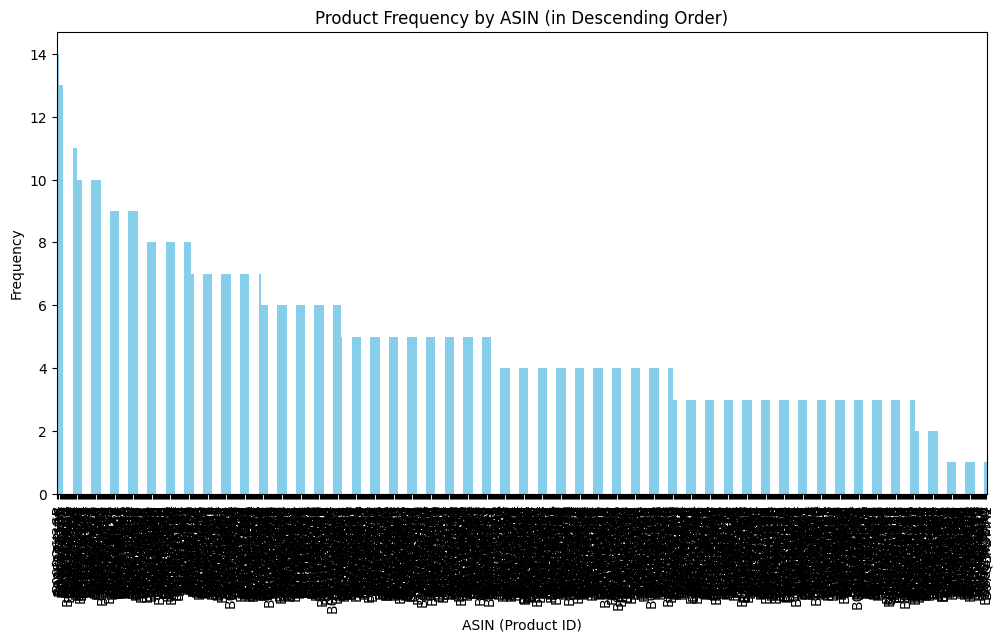

In [26]:
# Plot the frequencies in descending order
plt.figure(figsize=(12, 6))
product_frequencies.plot(kind='bar', color='skyblue')
plt.title('Product Frequency by ASIN (in Descending Order)')
plt.xlabel('ASIN (Product ID)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Your answer here

The graph exhibits a "long-tail" distribution, where a few products have a high number of interactions (frequency) while the majority of products have only a few. This indicates that users mostly interact with a small subset of popular items, while many other products are less frequently rated or reviewed. This distribution is common in e-commerce, where popular items receive most of the attention, and a large number of niche items see minimal engagement.

The long-tail problem in recommender systems can lead to a lack of diversity in recommendations, as most users will be shown popular items rather than niche ones. Here are two strategies to overcome this issue:

**Incorporate Diversity in Recommendations:**

Implement algorithms that balance popular items with niche items in recommendations. For example, use a hybrid approach combining collaborative filtering with content-based filte.lion.

**Use Contextual and Personalized Filte
ring:**
Contextual data (such as time, location, and user demographics) can help recommend less-popular items that are relevant to a specific user’s situation or interests, rather than just relying on overall popuroducts.

These strategies aim to expand user exposure to a wider variety of products, which can improve user satisfaction and reduce reliance on only the most popular items.

## Problem 5

### 1 point

Do you see any shortcomings of Collaborative Filtering due to the dataset or other factors? What modifications would you introduce to achieve better results?

# Your answer here

Collaborative Filtering (CF) is a powerful technique, but it has some limitations.

**Shortcomings of Collaborative Filtering
Data Sparsity:**


Collaborative Filtering relies on a large number of user-item interactions to generate accurate recommendations. In this dataset, there may be a limited number of reviews per user, and many products may have very few reviews (the "long-tail" problem). This sparsity can lead to unreliable similarity calculations, as there’s not enough data to identify patterns effectively.

**Cold Start Problem:**

CF struggles with new users and new items, as it depends on historical interaction data. For new users with few or no ratings, and new products with limited interactions, CF cannot generate recommendations effectively.

**Popularity Bias:**

CF methods tend to recommend popular items more frequently than niche items, as seen in the long-tail distribution of this dataset. This can limit diversity in recommendations and reinforce a cycle where only popular items continue to be recommended.

**Lack of Contextual Information:**

CF does not account for contextual factors like time of day, location, or 

# Suggested modifications :e Filtering Results

**Hybrid Approach (Collaborative + Content-Based Filtering):**

Combine Collaborative Filtering with Content-Based Filtering to leverage both user-item interactions purchase status, etc.). This hybrid approach can help mitigate the cold-start problem by recommending items with similar attributes to those the user has engaged with, even if interaction data is sparse.

**Matrix Factorization with Implicit Feedback:**

Use matrix factorization techniques, such as Singular Value Decomposition (SVD) or Alternating Least Squares (ALS), which can handle sparse data more effectively by reducing the dimensionality and learning latent factors. Incorporating implicit feedback, like 'helpful votes' or 'verified purchase' status, can also enhance the model, as these signals provide additional information about user preferences.

**Diversity-Boosted Recommendations:**

Implement diversity-boosting techniques to counteract popularity bias. For example, use a re-ranking strategy where less-popular items are given higher priority in recommendations if they closely match the user's interests. This approach can ensure that niche products in the tail of the distribution also get recommended, enhancing diversity.

**Context-Aware Recommendations:**

Incorporate temporal, contextual, or demographic information to make recommendations more raytime) can improve personalization.

**Enhanced Similarity Measures:**

Use alternative similarity measures, such as cosine similarity with adjusted weights for items with low frequency. Weighted similarity metrics can help improve predictions by giving more accurate scores to items with limited interactions, making recommendations for niche items more reliable.

**Deep Learning-Based Collaborative Filtering:**

Consider using neural collaborative filtering models (e.g., Neural Matrix Factorization) that can capture complex patterns in sparse data. Deep learning models can learn more sophisticated representations of users and items and are better suited for handling sparse darease the variety of products shown to users.

Kudos on completing the task! Hope you could learn a few new things along the way.

Here's an interesting approach that uses LLMs and the FAISS library to create a movie recommender system in python: https://www.youtube.com/watch?v=epidA1fBFtI&t=122s

Do explore the above resource as it might have a bunch of new techniques in store for you.